<a href="https://colab.research.google.com/github/Antech15/LAEP-Project/blob/main/LAEP_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get access to Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install scikeras

# Importing Libraries

In [7]:
import requests
import zipfile
import io
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pickle
import sklearn.ensemble as ek
from sklearn import tree, linear_model
from sklearn.feature_selection import SelectFromModel,f_classif,SelectKBest
import joblib
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,recall_score,precision_score,classification_report,ConfusionMatrixDisplay,balanced_accuracy_score,roc_curve,roc_auc_score,make_scorer
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn import svm
from sklearn.linear_model import LogisticRegression,LassoCV
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.model_selection import train_test_split,KFold, cross_val_score,GridSearchCV,RepeatedStratifiedKFold,RandomizedSearchCV,StratifiedKFold,cross_validate
from mlxtend.plotting import plot_confusion_matrix
import seaborn as sns
from collections import Counter
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from prettytable import PrettyTable
from numpy import mean,std
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.neural_network import MLPClassifier
from scipy.stats import randint as sp_randint
from keras.models import Sequential
from keras import layers,Input, backend as K
import tensorflow as tf
from scikeras.wrappers import KerasClassifier
import warnings
warnings.filterwarnings("ignore")

# Importing Dataset
"CICIoT2023.zip" from https://www.unb.ca/cic/datasets/iotdataset-2023.html

In [8]:
#Zip filepath in Google Drive
directory = '/content/drive/MyDrive/CICIoT2023/CICIoT2023.zip'

#Opens the zip file
with zipfile.ZipFile(directory, 'r') as f:
  files = f.namelist()

  #Gets all files
  for file in files:
    contents = f.read(file)

#converts them to string
df_sets = contents.decode('utf-8')

#Puts data into a dataframe df
df = pd.read_csv(io.StringIO(df_sets),sep=',')

In [9]:
df

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,0.00,1.00,102.20,204.980158,204.980158,0.0,0.0,0.0,0.0,...,0.000000,42.0,8.315011e+07,9.5,9.165151,0.00000,0.000000,0.00,141.55,DDoS-ICMP_Flood
1,0.000000,54.00,6.00,64.00,0.000000,0.000000,0.0,1.0,0.0,1.0,...,0.000000,54.0,8.334862e+07,9.5,10.392305,0.00000,0.000000,0.00,141.55,DDoS-RSTFINFlood
2,0.000000,54.00,6.00,64.00,0.000000,0.000000,0.0,0.0,1.0,0.0,...,0.000000,54.0,8.308927e+07,9.5,10.392305,0.00000,0.000000,0.00,141.55,DDoS-SYN_Flood
3,3.394034,210.60,6.00,64.00,1.144677,1.144677,0.0,0.0,1.0,0.0,...,0.000000,54.0,8.336215e+07,9.5,10.392305,0.00000,0.000000,0.00,141.55,DDoS-SynonymousIP_Flood
4,0.000000,54.00,6.00,64.00,0.992022,0.992022,0.0,1.0,0.0,1.0,...,0.000000,54.0,8.334381e+07,9.5,10.392305,0.00000,0.000000,0.00,141.55,DDoS-RSTFINFlood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451493,0.137860,40275.00,17.00,64.00,8775.835347,8775.835347,0.0,0.0,0.0,0.0,...,0.000000,50.0,8.310664e+07,9.5,10.000000,0.00000,0.000000,0.00,141.55,DDoS-UDP_Flood
451494,4.749410,108.00,6.00,64.00,0.421105,0.421105,0.0,0.0,0.0,0.0,...,0.000000,54.0,8.295157e+07,9.5,10.392305,0.00000,0.000000,0.00,141.55,DoS-TCP_Flood
451495,0.006198,2.96,1.04,72.91,5.956262,5.956262,0.0,0.0,0.0,0.0,...,0.401681,42.5,8.314935e+07,9.5,9.179101,0.57063,3.258608,0.05,141.55,DDoS-ICMP_Flood
451496,0.086669,38225.00,17.00,64.00,8818.813708,8818.813708,0.0,0.0,0.0,0.0,...,0.000000,50.0,8.310246e+07,9.5,10.000000,0.00000,0.000000,0.00,141.55,DDoS-UDP_Flood


# Get only Mirai and BenignTraffic


In [10]:
#Gets only rows that are Benign or Mirai
mb = df.loc[ df['label'].str.startswith('Mirai') | (df['label'] == 'BenignTraffic')]

mb

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
6,8.329788,71185.30,6.00,63.60,37.023469,37.023469,0.0,0.0,0.0,0.0,...,632.147529,1369.20,1.665208e+08,13.5,47.522466,888.638462,3.961184e+05,1.00,244.60,BenignTraffic
12,0.000000,0.00,46.06,62.72,1.029473,1.029473,0.0,0.0,0.0,0.0,...,33.063490,581.36,8.367710e+07,9.5,34.129158,46.839368,4.634844e+03,0.24,141.55,Mirai-greeth_flood
16,0.319927,1090164.00,6.00,81.70,3852.909306,3852.909306,0.0,0.0,0.0,0.0,...,932.098759,783.60,7.758141e-05,5.5,35.888960,1318.186707,1.090193e+06,0.80,38.50,BenignTraffic
25,4.836877,3005222.86,16.67,65.27,1126.175684,1126.175684,0.0,0.0,0.0,0.0,...,39.687454,544.22,8.376312e+07,9.5,32.798468,56.200558,6.017246e+03,0.28,141.55,Mirai-udpplain
38,0.000000,0.00,47.00,64.00,0.887306,0.887306,0.0,0.0,0.0,0.0,...,0.000000,592.00,8.369855e+07,9.5,34.409301,0.000000,0.000000e+00,0.00,141.55,Mirai-greeth_flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451422,30.430965,11841.60,15.90,82.70,4.181790,4.181790,0.0,0.0,0.0,0.0,...,14.239332,71.20,1.871760e-02,5.5,10.978598,20.137457,5.100214e+02,0.90,38.50,BenignTraffic
451431,28.564549,1133642.50,7.10,129.80,38.352344,38.352344,0.0,0.0,0.0,0.0,...,35.756337,115.00,1.665182e+08,13.5,12.553609,50.777190,1.748025e+03,1.00,244.60,BenignTraffic
451454,2.193113,2498311.46,16.55,69.73,1992.479466,1992.479466,0.0,0.0,0.0,0.0,...,40.595509,525.52,8.378915e+07,9.5,32.170910,57.476626,7.640172e+03,0.24,141.55,Mirai-udpplain
451470,0.183267,594412.60,6.00,93.50,3358.258648,3358.258648,0.0,0.0,0.0,0.0,...,809.529124,1057.20,1.665202e+08,13.5,41.932138,1145.335933,6.676318e+05,1.00,244.60,BenignTraffic


# Exploring

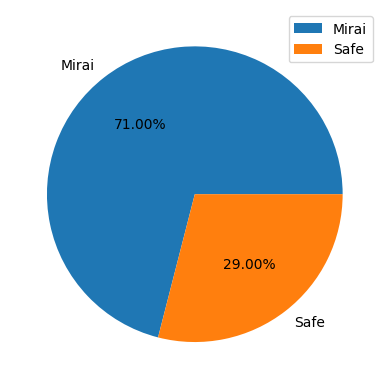

In [11]:
#Converts Benign to safe and all others to Malicious
mb.label.replace(('BenignTraffic'), ('Safe'), inplace=True)
mb.label = mb.label.apply(lambda x: x if x is 'Safe' else 'Mirai')

plt.pie(mb.label.value_counts().values.tolist(), labels=['Mirai', 'Safe'], autopct='%.2f%%')
plt.legend()
plt.show()

# First, split the data to 70/30

In [28]:
mb.shape
print("Total:\t",mb.shape)

Y = mb['label']
X = mb.drop(['label'], axis=1)

# Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)
# define random_state to avoid a different random value, and subsequently avoid a different dataset split, each time we run the program

print("X train:",X_train.shape)
print("Y train:", y_train.shape)

print("X test:\t",X_test.shape)
print("Y test:\t", y_test.shape)

Total:	 (36233, 47)
X train: (25363, 46)
Y train: (25363,)
X test:	 (10870, 46)
Y test:	 (10870,)


In [29]:
#Mirai vs safe in training set
y_train.value_counts()

Mirai    18015
Safe      7348
Name: label, dtype: int64

# First, try decision tree without feature selection
## Train and evaluate classification tree


In [30]:
tree_classifier = tree.DecisionTreeClassifier(random_state=10)

In [32]:
tree1 = tree_classifier.fit(X_train, y_train)

In [33]:
tree1.score(X_test, y_test)

0.9965041398344067

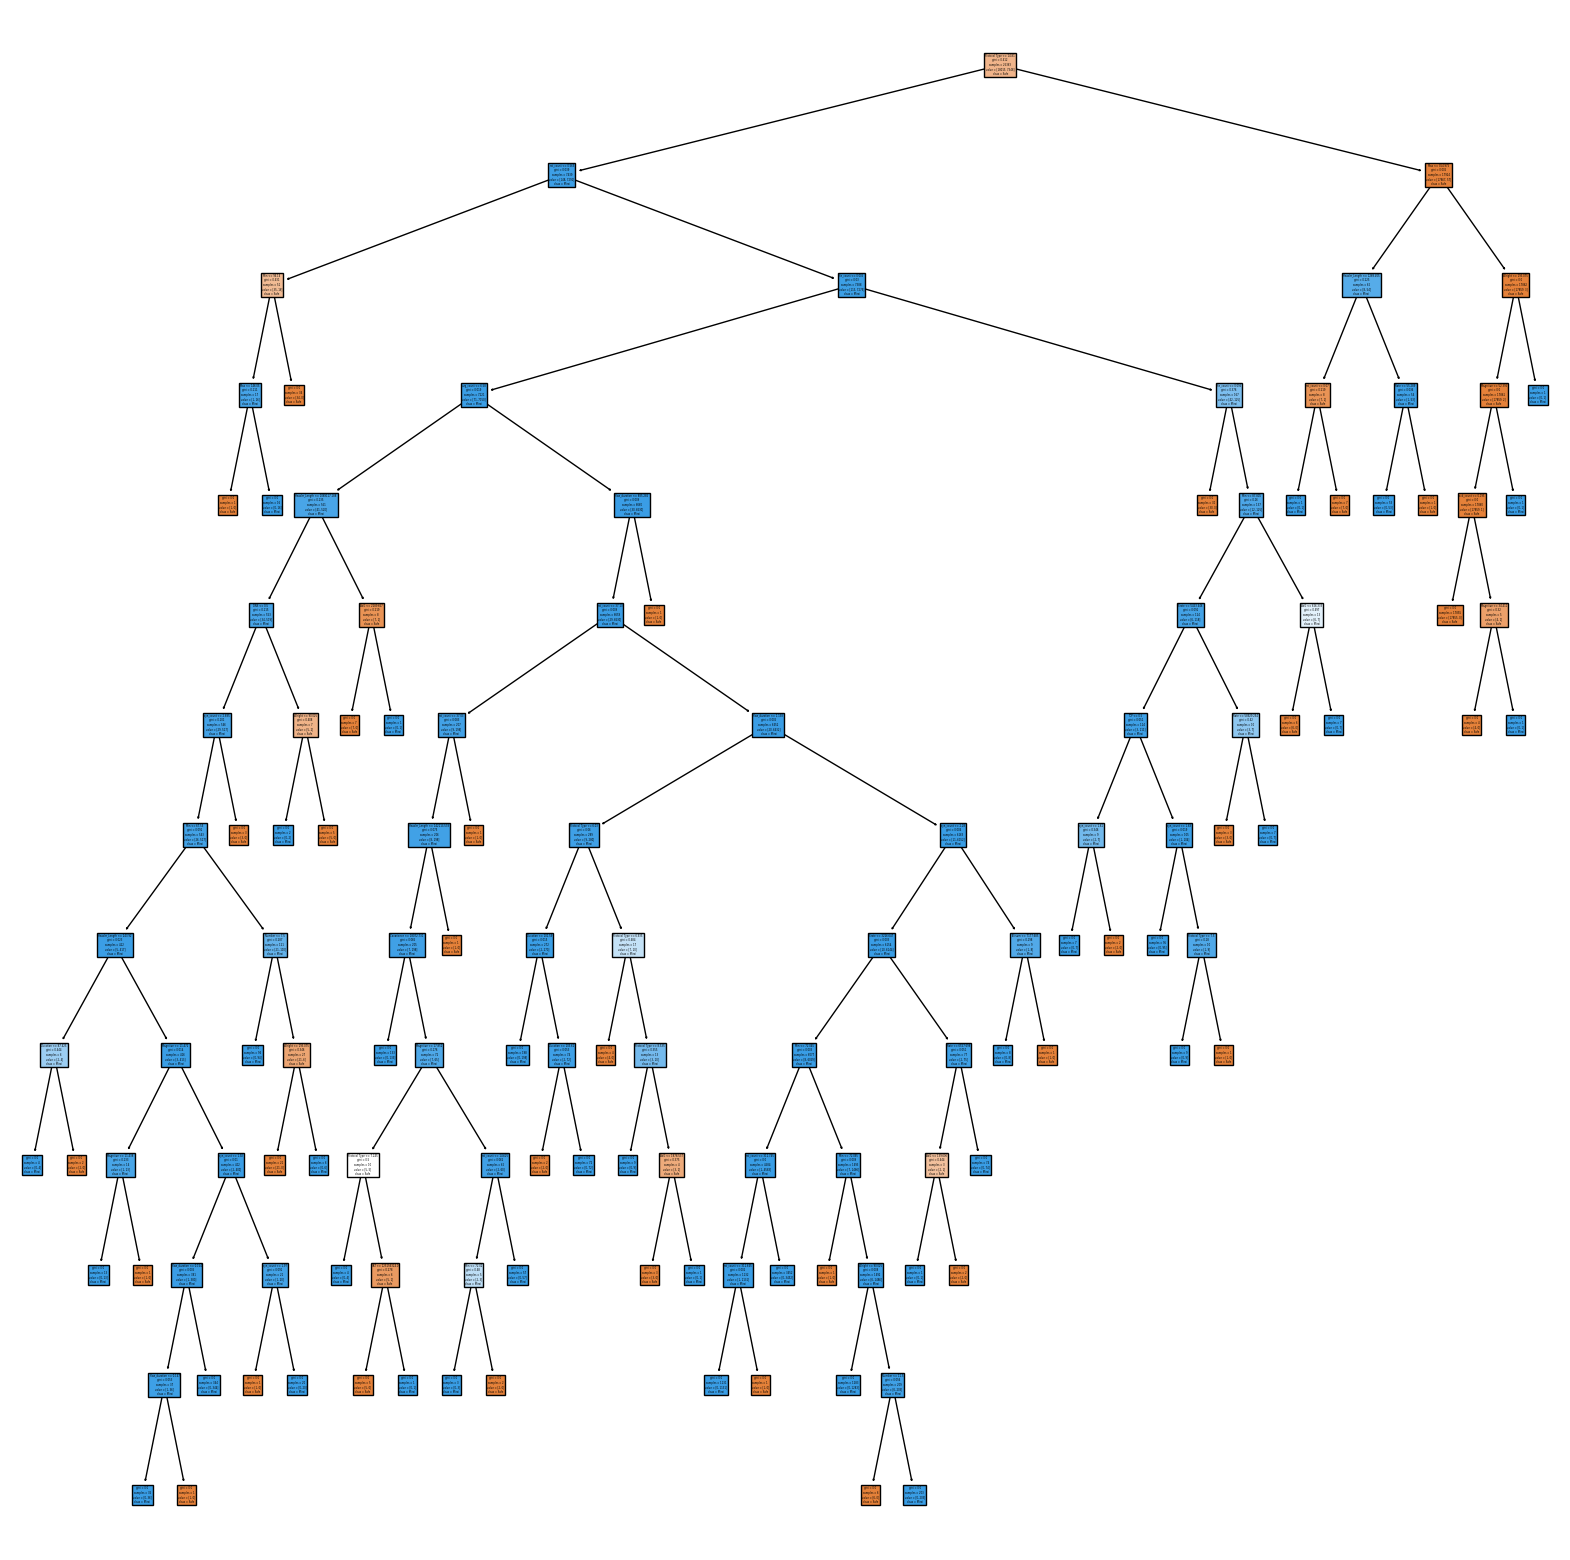

In [23]:
plt.figure(figsize = (20, 20))
tree.plot_tree(tree1, feature_names = list(X.columns), class_names = ['Safe', 'Mirai'], filled = True);

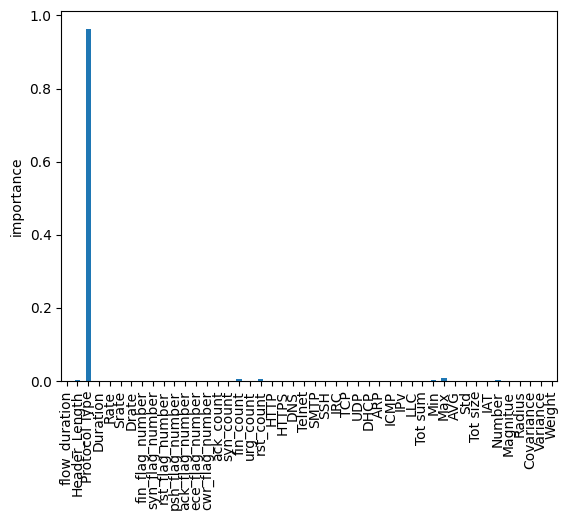

In [24]:
importance = tree1.feature_importances_
feature_importance = pd.Series(importance, index = X.columns)
feature_importance.plot(kind = 'bar')
plt.ylabel('importance');

## Show Dot plot to see where they are

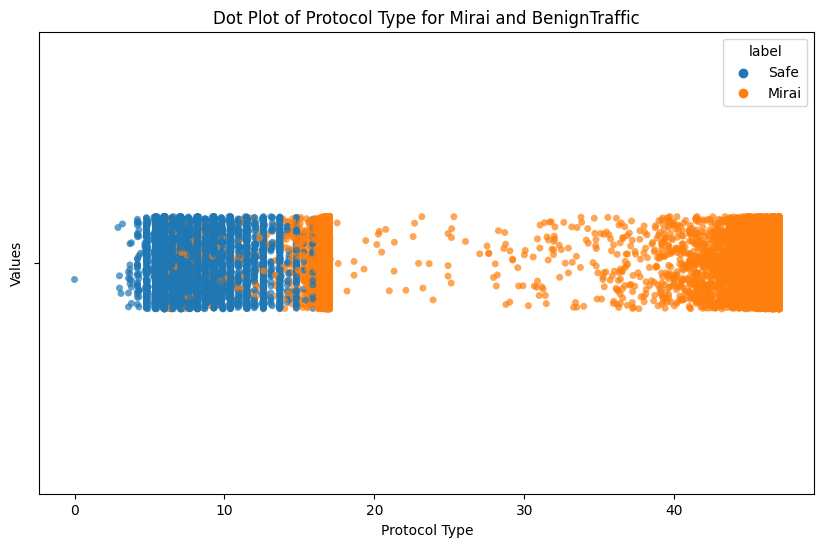

In [25]:
# Create a dot plot using Seaborn
plt.figure(figsize=(10, 6))
sns.stripplot(x='Protocol Type', jitter=True, hue='label', data=mb, marker='o', alpha=0.7)
plt.title('Dot Plot of Protocol Type for Mirai and BenignTraffic')
plt.xlabel('Protocol Type')
plt.ylabel('Values')
plt.show()

## Separate the dots

<Figure size 2000x600 with 0 Axes>

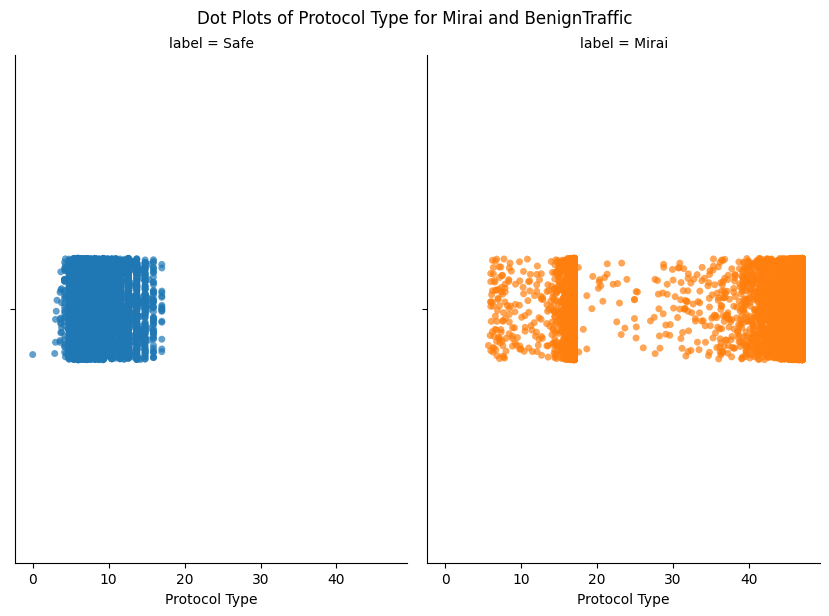

In [26]:
plt.figure(figsize=(20, 6))
sns.catplot(x='Protocol Type', hue='label', col='label', kind='strip', data=mb, marker='o', alpha=0.7, height=6, aspect=0.7)
plt.suptitle('Dot Plots of Protocol Type for Mirai and BenignTraffic', y=1.02)
plt.xlabel('Protocol Type')
plt.ylabel('Values')
plt.show()

## Drop Protocol type?

In [27]:
mb2 = mb.drop(columns=['Protocol Type'], axis=1)

In [34]:
mb2.shape
print("Total:\t",mb2.shape)

Y = mb2['label']
X = mb2.drop(['label'], axis=1)

# Split the dataset into train and test
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, Y, test_size = 0.3, random_state = 100)
# define random_state to avoid a different random value, and subsequently avoid a different dataset split, each time we run the program

print("X train:",X_train2.shape)
print("Y train:", y_train2.shape)

print("X test:\t",X_test2.shape)
print("Y test:\t", y_test2.shape)

Total:	 (36233, 46)
X train: (25363, 45)
Y train: (25363,)
X test:	 (10870, 45)
Y test:	 (10870,)


In [35]:
tree_classifier2 = tree.DecisionTreeClassifier(random_state=10)

In [36]:
tree2 = tree_classifier2.fit(X_train2, y_train2)

In [37]:
tree2.score(X_test2, y_test2)

0.9980680772769089

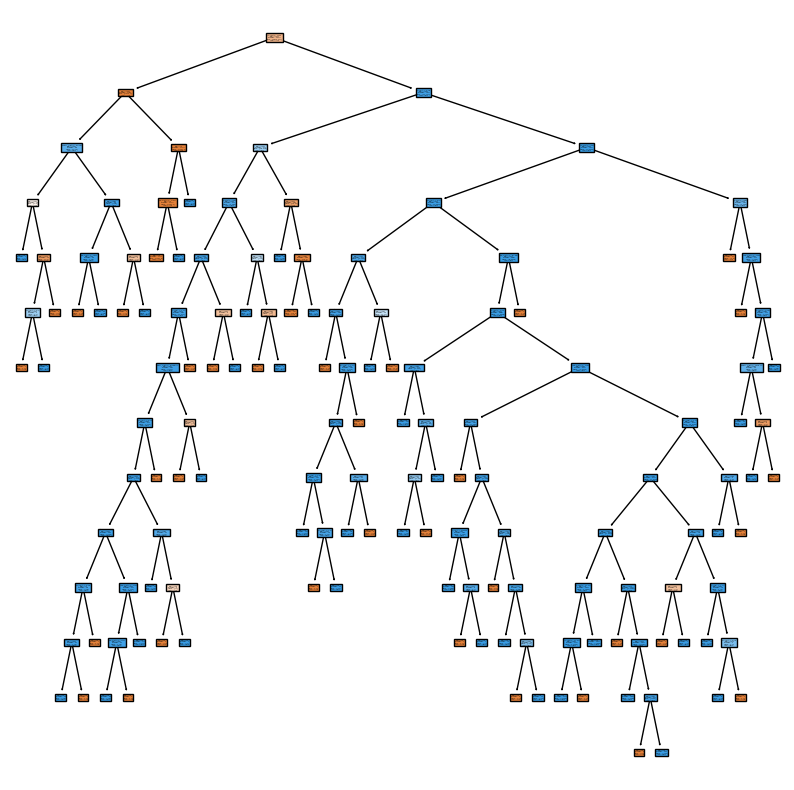

In [39]:
plt.figure(figsize = (10, 10))
tree.plot_tree(tree2, feature_names = list(X.columns), class_names = ['Safe', 'Mirai'], filled = True);

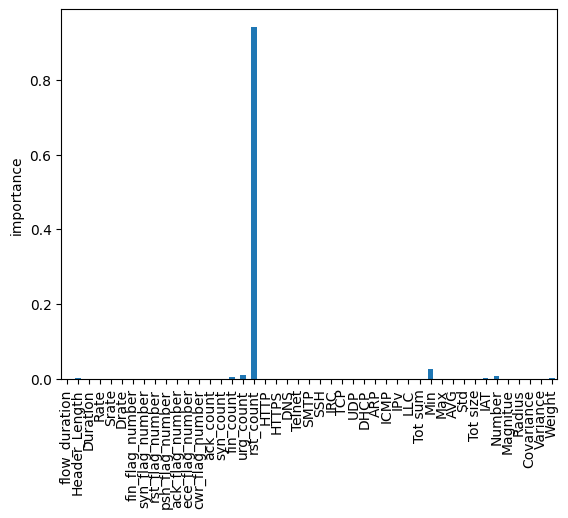

In [38]:
importance = tree2.feature_importances_
feature_importance = pd.Series(importance, index = X.columns)
feature_importance.plot(kind = 'bar')
plt.ylabel('importance');

## Show the new Dot Plot

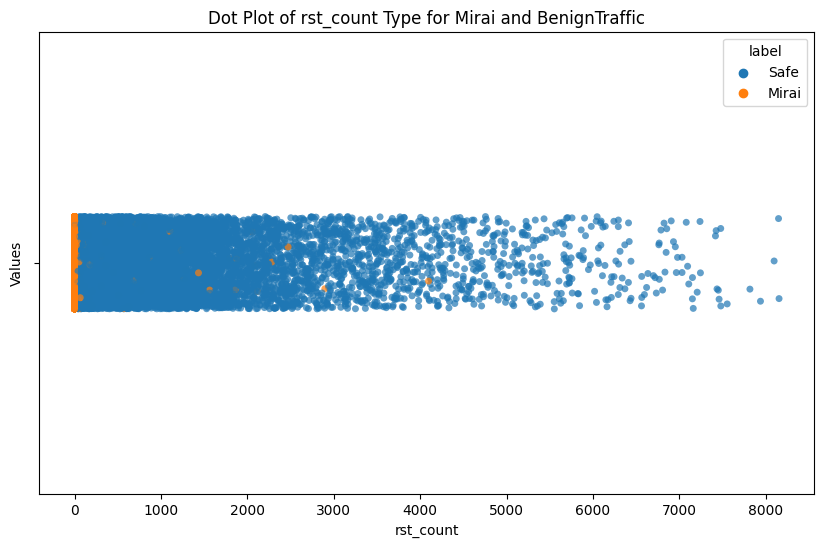

In [40]:
# Create a dot plot using Seaborn
plt.figure(figsize=(10, 6))
sns.stripplot(x='rst_count', jitter=True, hue='label', data=mb, marker='o', alpha=0.7)
plt.title('Dot Plot of rst_count Type for Mirai and BenignTraffic')
plt.xlabel('rst_count')
plt.ylabel('Values')
plt.show()

## Separate the dots

<Figure size 2000x600 with 0 Axes>

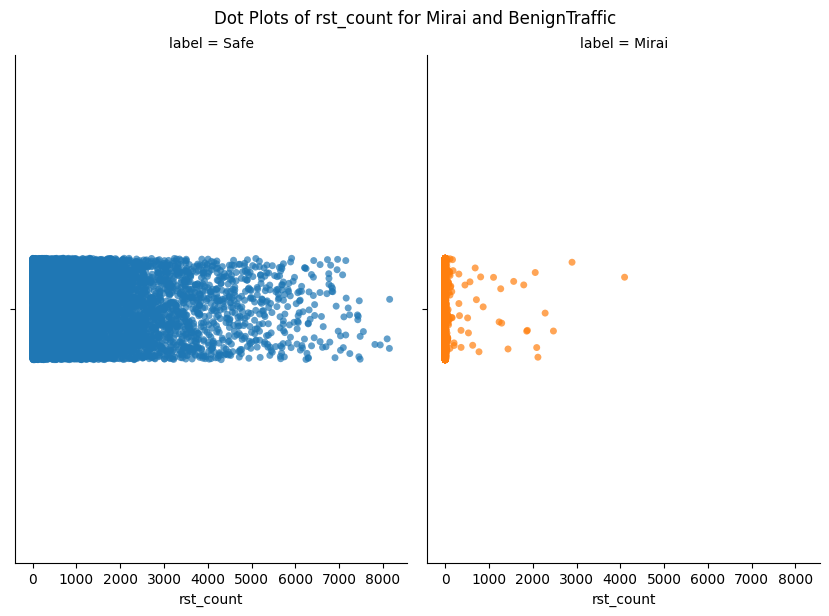

In [41]:
plt.figure(figsize=(20, 6))
sns.catplot(x='rst_count', hue='label', col='label', kind='strip', data=mb, marker='o', alpha=0.7, height=6, aspect=0.7)
plt.suptitle('Dot Plots of rst_count for Mirai and BenignTraffic', y=1.02)
plt.xlabel('rst_count')
plt.ylabel('Values')
plt.show()

## Now drop rst_count

In [43]:
mb3 = mb2.drop(columns=['rst_count'], axis=1)

In [44]:
mb3.shape
print("Total:\t",mb2.shape)

Y = mb3['label']
X = mb3.drop(['label'], axis=1)

# Split the dataset into train and test
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, Y, test_size = 0.3, random_state = 100)
# define random_state to avoid a different random value, and subsequently avoid a different dataset split, each time we run the program

print("X train:",X_train3.shape)
print("Y train:", y_train3.shape)

print("X test:\t",X_test3.shape)
print("Y test:\t", y_test3.shape)

Total:	 (36233, 46)
X train: (25363, 44)
Y train: (25363,)
X test:	 (10870, 44)
Y test:	 (10870,)


In [46]:
tree_classifier3 = tree.DecisionTreeClassifier(random_state=10)

In [50]:
tree3 = tree_classifier3.fit(X_train3, y_train3)

In [51]:
tree3.score(X_test3, y_test3)

0.9965041398344067

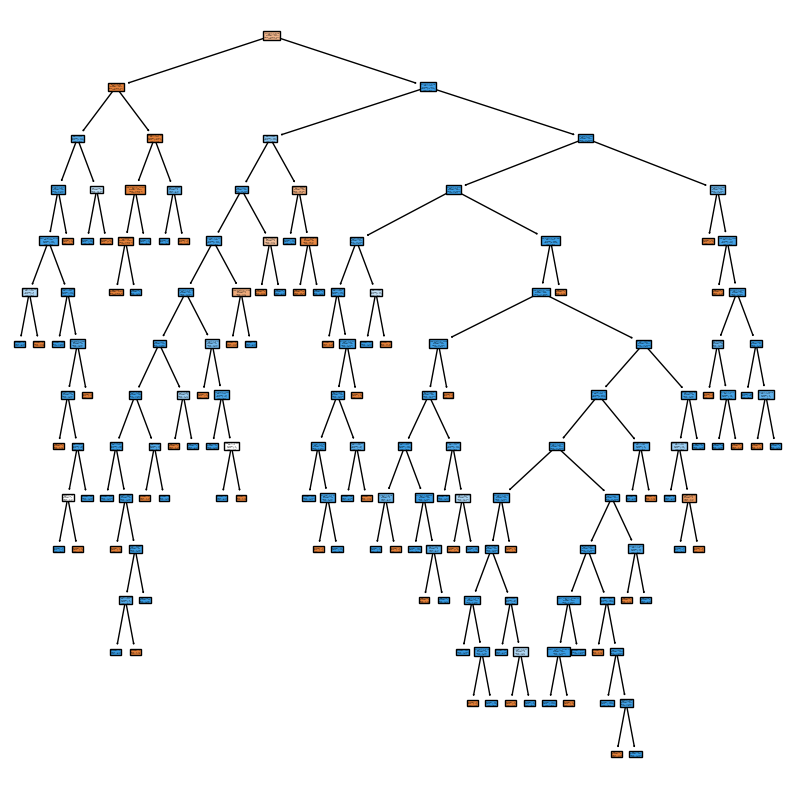

In [52]:
plt.figure(figsize = (10, 10))
tree.plot_tree(tree3, feature_names = list(X.columns), class_names = ['Safe', 'Mirai'], filled = True);

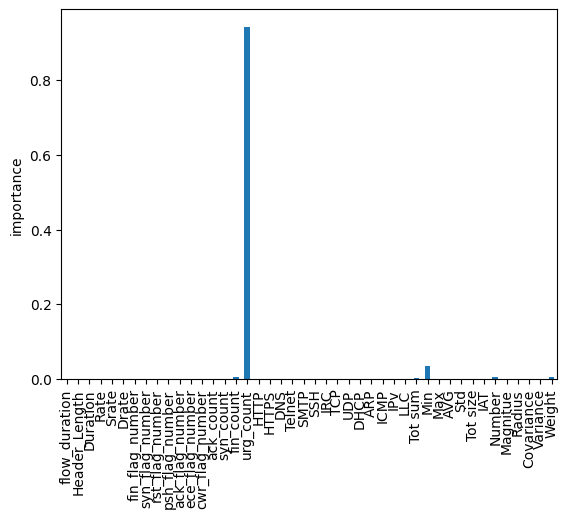

In [53]:
importance = tree3.feature_importances_
feature_importance = pd.Series(importance, index = X.columns)
feature_importance.plot(kind = 'bar')
plt.ylabel('importance');

## Dot Plot

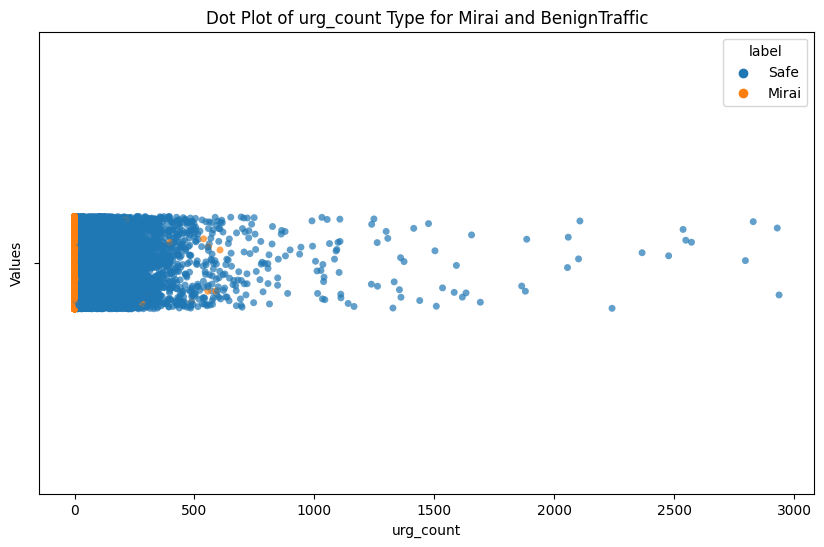

In [54]:
# Create a dot plot using Seaborn
plt.figure(figsize=(10, 6))
sns.stripplot(x='urg_count', jitter=True, hue='label', data=mb, marker='o', alpha=0.7)
plt.title('Dot Plot of urg_count Type for Mirai and BenignTraffic')
plt.xlabel('urg_count')
plt.ylabel('Values')
plt.show()

## Separate the dots

<Figure size 2000x600 with 0 Axes>

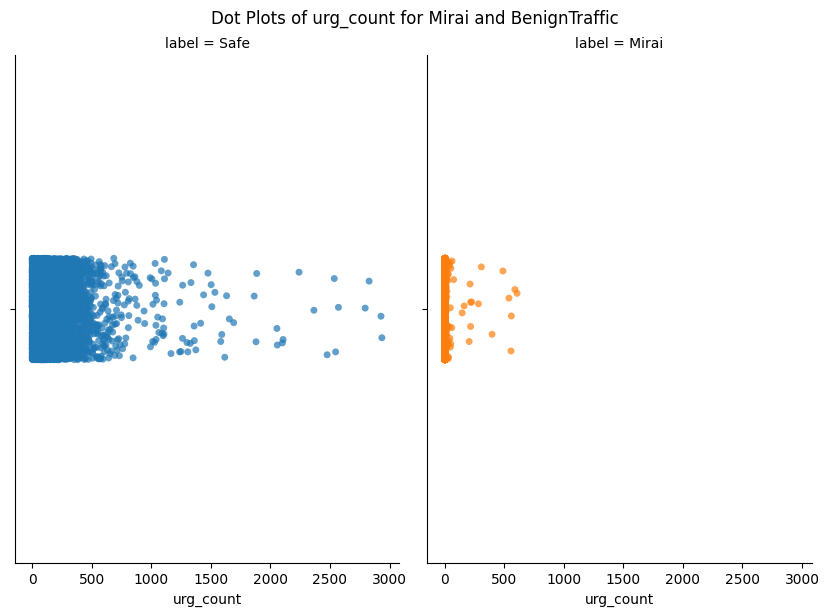

In [55]:
plt.figure(figsize=(20, 6))
sns.catplot(x='urg_count', hue='label', col='label', kind='strip', data=mb, marker='o', alpha=0.7, height=6, aspect=0.7)
plt.suptitle('Dot Plots of urg_count for Mirai and BenignTraffic', y=1.02)
plt.xlabel('urg_count')
plt.ylabel('Values')
plt.show()

#Confusion Matrix for decision tree (original)

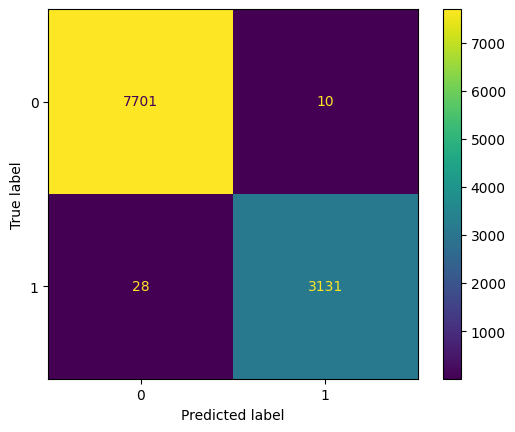


Accuracy: 0.996504

F1 score: [0.99753886 0.99396825]
              precision    recall  f1-score   support

       Mirai       1.00      1.00      1.00      7729
        Safe       0.99      1.00      0.99      3141

    accuracy                           1.00     10870
   macro avg       0.99      1.00      1.00     10870
weighted avg       1.00      1.00      1.00     10870



In [56]:
#Make predictions
y_pred1 = tree1.predict(X_test)

#confusion matrix
cm1 = confusion_matrix(y_test, y_pred1)

disp = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp.plot()
plt.show()

acc = accuracy_score(y_test, y_pred1)
print("\nAccuracy: %f" % acc)

f1 = f1_score(y_test, y_pred1, average=None)
print("\nF1 score:", f1)

print(classification_report(y_pred1,y_test))

## Confusion Matrix without protocol type

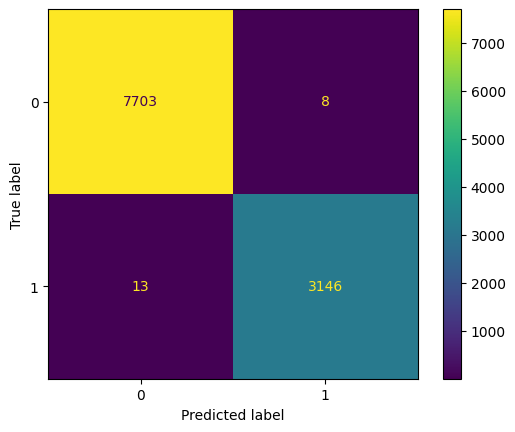


Accuracy: 0.998068

F1 score: [0.99863875 0.99667353]
              precision    recall  f1-score   support

       Mirai       1.00      1.00      1.00      7716
        Safe       1.00      1.00      1.00      3154

    accuracy                           1.00     10870
   macro avg       1.00      1.00      1.00     10870
weighted avg       1.00      1.00      1.00     10870



In [57]:
#Make predictions
y_pred2 = tree2.predict(X_test2)

#confusion matrix
cm2 = confusion_matrix(y_test2, y_pred2)

disp = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp.plot()
plt.show()

acc2 = accuracy_score(y_test2, y_pred2)
print("\nAccuracy: %f" % acc2)

f1_2 = f1_score(y_test2, y_pred2, average=None)
print("\nF1 score:", f1_2)

print(classification_report(y_pred2,y_test2))

# Random Forest

In [58]:
rf_c1 = RandomForestClassifier(criterion = "gini", max_depth = 8, min_samples_split = 10, random_state=10)

In [59]:
rf_c1.fit(X_train, y_train)
rf_c1.score(X_test, y_test)

0.9984360625574977

In [66]:
X_test.columns

Index(['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate',
       'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet',
       'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC',
       'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number',
       'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight'],
      dtype='object')

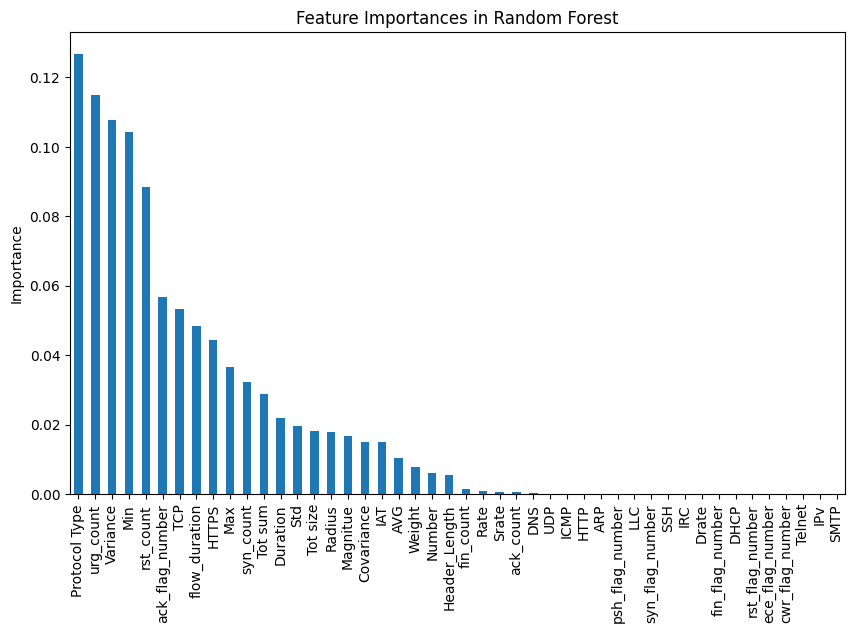

In [71]:
importance_rf = rf_c1.feature_importances_
feature_importance_rf = pd.Series(importance_rf, index = X_test.columns)
plt.figure(figsize=(10, 6))
feature_importance_rf.sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Importance')
plt.title('Feature Importances in Random Forest')
plt.show()


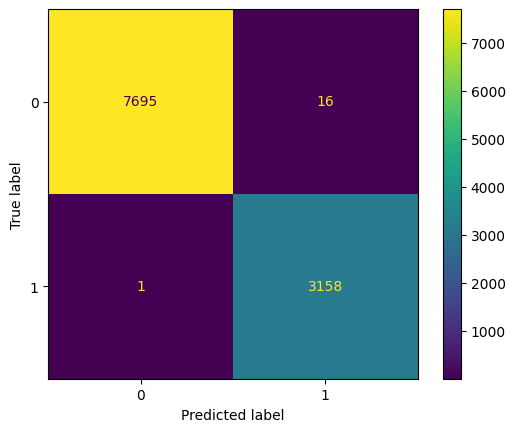


Accuracy: 0.998436

F1 score: [0.99889661 0.99731565]
              precision    recall  f1-score   support

       Mirai       1.00      1.00      1.00      7696
        Safe       1.00      0.99      1.00      3174

    accuracy                           1.00     10870
   macro avg       1.00      1.00      1.00     10870
weighted avg       1.00      1.00      1.00     10870



In [72]:
#Make predictions
y_pred3 = rf_c1.predict(X_test)

#confusion matrix
cm3 = confusion_matrix(y_test, y_pred3)

disp = ConfusionMatrixDisplay(confusion_matrix=cm3)
disp.plot()
plt.show()

acc3 = accuracy_score(y_test, y_pred3)
print("\nAccuracy: %f" % acc3)

f1_3 = f1_score(y_test, y_pred3, average=None)
print("\nF1 score:", f1_3)

print(classification_report(y_pred3,y_test))

# Linear Regression